## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

In [4]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('..', 'keras_retinanet/bin/snapshots', 'vgg16_csv_10.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='vgg16')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'L', 1: 'R1', 2: 'R2'}

## Run detection on example

In [5]:
# load image
image = read_image_bgr('/home/dillon/python/projects/lead_detection/images/Image00000.BMP')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image, mode='pass')
image, scale = resize_image(image)

In [6]:
# process image
start = time.time()
boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

processing time:  6.193170070648193


In [8]:
predictions = np.concatenate((boxes[0], scores.T), axis=1)
predictions = np.concatenate((predictions, labels.T), axis=1)

In [9]:
boxes_df = pd.DataFrame(data=predictions,
                        columns=['xmin', 'ymin', 'xmax', 'ymax', 'score', 'label'])

In [20]:
boxes_df.shape

(300, 6)

In [19]:
filtered_boxes = boxes_df[boxes_df['score'] >= 0.90]
print(filtered_boxes.shape)

(48, 6)


In [21]:
def rectange_overlap(topleft_1, bottomright_1, topleft_2, bottomright_2):
    '''Check if rectanges overlap, return True for overlapping rectangles.
    
    Args:
        topleft_#, bottomright_# (tuple): (x, y) coordinates of rectangle corner
    Returns:
        bool: True for overlap, False for no overlap
    '''
    # Check if one rectangle is to the left of the other
    if topleft_1[0] > bottomright_2[0] or topleft_2[0] > bottomright_1[0]:
        return False
    # Check if one rectange is above the other
    if topleft_1[1] < bottomright_2[1] or topleft_2[1] < bottomright_1[1]:
        return False
    return True

In [23]:
selected_list = []
for index, row in filtered_boxes.iterrows():
    best_box = row
    row_topleft = (row['xmin'], row['ymax'])
    row_bottomright = (row['xmax'], row['ymin'])
    for i, r in filtered_boxes.iloc[index:].iterrows():
        r_topleft = (row['xmin'], row['ymax'])
        r_bottomright = (row['xmax'], row['ymin'])
        if rectange_overlap(row_topleft, row_bottomright, r_topleft, r_bottomright):
            if r['score'] >= row['score']:
                best_box = r
    selected_list.append(best_box)
    
selected_boxes = pd.DataFrame(data=selected_list,
                              columns=['xmin', 'ymin', 'xmax', 'ymax', 'score', 'label'])

In [24]:
selected_boxes.shape

(48, 6)

/home/dillon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

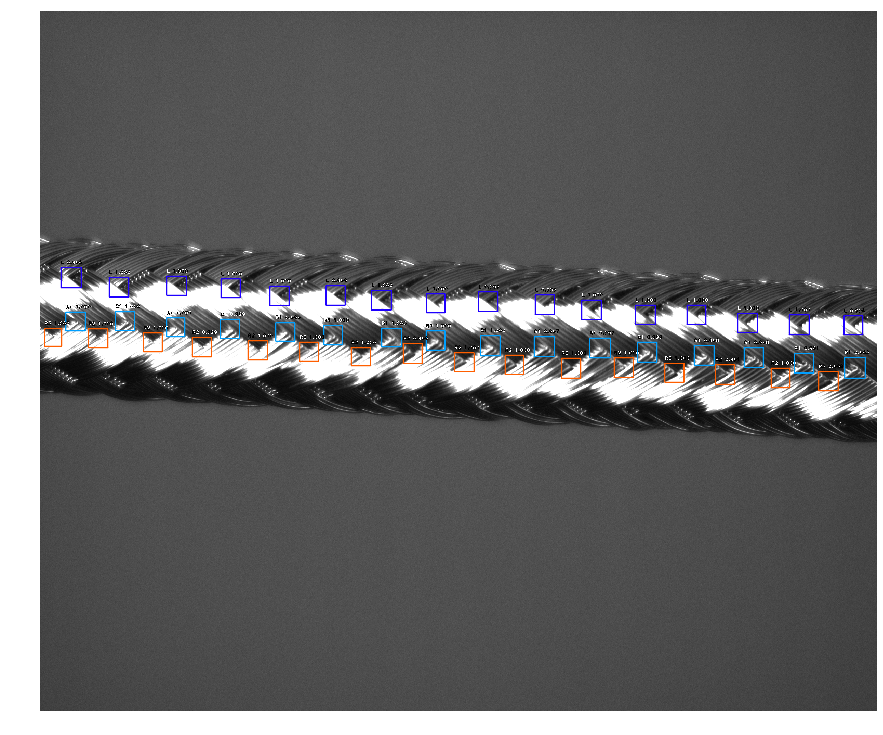

In [7]:
# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.90:
        break
    
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [26]:
selected_boxes.head(1)

,xmin,ymin,xmax,ymax,score,label
0,1360.952515,1008.056091,1414.934204,1064.642456,0.999998,2.0


In [44]:
label0_boxes = selected_boxes[selected_boxes['label'] == 2].sort_values(by=['xmin'])
label0_boxes

,xmin,ymin,xmax,ymax,score,label
18,13.498305,930.047729,63.364758,982.145569,0.999820,2.0
11,141.019821,931.329834,198.578705,986.595703,0.999896,2.0
16,302.404663,943.810181,357.830658,998.733337,0.999829,2.0
31,445.303833,956.050476,501.942291,1013.217590,0.999174,2.0
20,608.385681,966.610596,665.453674,1022.352661,0.999806,2.0
10,759.579773,970.558105,814.179321,1026.386963,0.999924,2.0
4,910.655029,986.231934,966.612671,1039.896362,0.999989,2.0
33,1062.984497,974.831177,1117.736572,1032.595581,0.999101,2.0
2,1212.985107,1001.928467,1269.621948,1056.685303,0.999994,2.0
0,1360.952515,1008.056091,1414.934204,1064.642456,0.999998,2.0


In [67]:
label0_arr = label0_boxes.apply(lambda row: np.asarray([(np.mean([row.xmax, row.xmin]).astype(np.int)),
                                                          np.mean([row.ymax, row.ymin]).astype(np.int)]),
                                                          axis=1).values

In [68]:
label0_arr

array([array([ 38, 956]), array([169, 958]), array([330, 971]),
       array([473, 984]), array([636, 994]), array([786, 998]),
       array([ 938, 1013]), array([1090, 1003]), array([1241, 1029]),
       array([1387, 1036]), array([1553, 1046]), array([1707, 1045]),
       array([1855, 1060]), array([2003, 1065]), array([2166, 1074]),
       array([2305, 1084])], dtype=object)

In [69]:
def pythagorean_distance(arr_1, arr_2):
    return np.sqrt((arr_2[0] - arr_1[0])**2 + (arr_2[1] - arr_1[1])**2)

In [82]:
label0_distance = np.asarray([pythagorean_distance(label0_arr[i], label0_arr[i+1]) for i in range(len(label0_arr) - 1)])

In [90]:
label0_lead_length = []
for i in range(len(label0_distance) % 12):
    label0_lead_length.append(np.sum(label0_distance[i:i+12]))

In [91]:
label0_lead_length

[1823.007811089595, 1840.0769801774395, 1841.801265324632]

In [361]:
img = read_image_bgr('/home/dillon/python/projects/lead_detection/images/Image00000.BMP')
img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img,10,88,10)

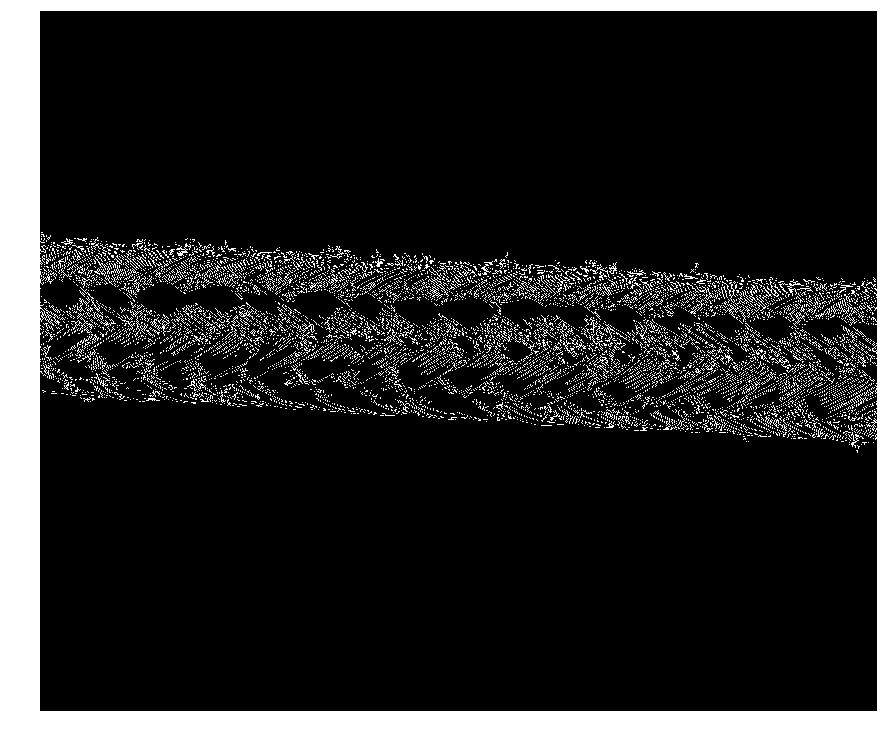

In [362]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(edges, cmap='gray')
plt.show()

In [363]:
top_edge = np.argmax(edges, 0)

In [364]:
top_fit = np.polyfit(np.arange(0, edges.shape[1], 1), top_edge, 1)
top_func = np.poly1d(top_fit)

In [365]:
flip_edges = np.flipud(edges)
bottom_edge = np.subtract(edges.shape[0], np.argmax(flip_edges, 0))

In [366]:
bottom_fit = np.polyfit(np.arange(0, edges.shape[1], 1), bottom_edge, 1)
bottom_func = np.poly1d(bottom_fit)

In [367]:
od_locations = np.arange(0, img.shape[1], int(img.shape[1] / 12))
braid_od = [bottom_func(x) - top_func(x) for x in od_locations]
braid_od_pix = np.mean(braid_od)

In [368]:
braid_od_mm = np.mean([11.75, 11.56, 11.62])
pix_per_mm = braid_od_pix / braid_od_mm
print("Pixels per mm: {0:.2f}".format(pix_per_mm))

Pixels per mm: 39.74


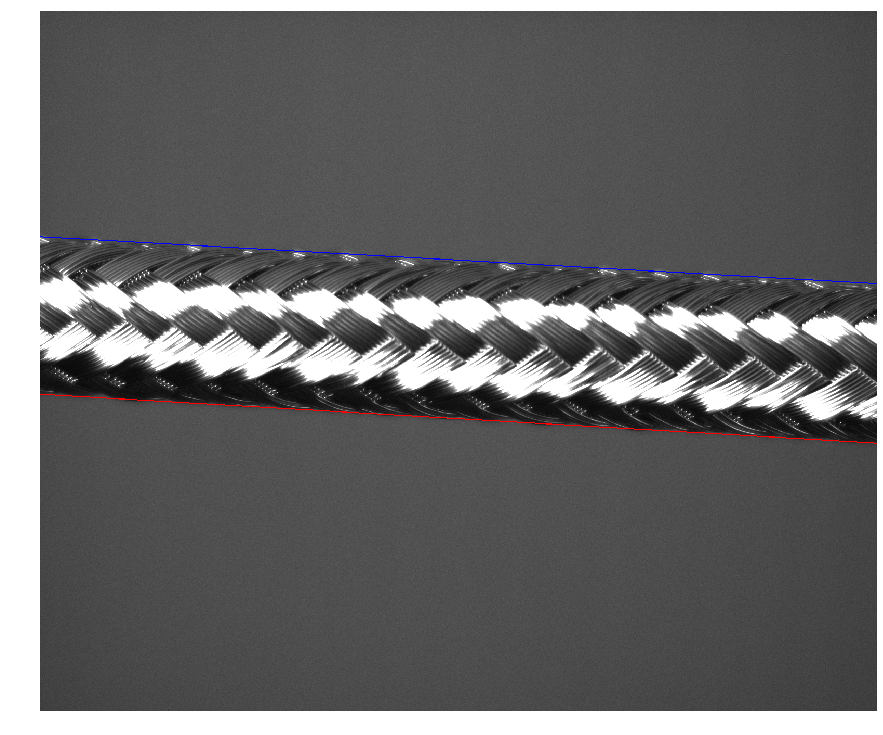

In [369]:
# Top boundary line
cv2.line(img, (0,int(top_func(0))), (2448,int(top_func(2448))), (0,0,255), 2)
# Bottom boundary line
cv2.line(img, (0,int(bottom_func(0))), (2448,int(bottom_func(2448))), (255,0,0), 2)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [370]:
avg_lead_length = np.mean(label0_lead_length)
print("Label0 lead length: {0:.2f}mm ({1:.4f}in)".format(avg_lead_length / pix_per_mm,
                                                         avg_lead_length / pix_per_mm / 25.4))
print("Target lead length: 1.75in")

Label0 lead length: 46.17mm (1.8178in)
Target lead length: 1.75in
